# GLM

## Exercise 1: Correlations

1. Loading the data

- Load the `diabetes` dataset through the `sklearn` library 
- Use the `DESCR` attribute of the data set to get its description. Understand the variables, their meanings, and how they relate to the medical context (e.g., what each feature like BMI, age, and blood pressure represents in the context of diabetes).

*Hint: If you're using a Jupyter Notebook, make sure to select any of "View as a scrollable element or open in a text editor" at the bottom of the output to see the entire description.*

2. Preparing the data

- Look at the documentation of the `load_diabetes()` function to see which outpt it returns
- Create an observation matrix `X` containing the data and a target vector `y` containing the target (diabetes progression)
- Create a unified DataFrame combining X and y. Rename the `target` (y) column to `diabetes`
- Compute the correlation matrix for all columns in the data

3. Visualizing the data

- Plot the correlation matrix by using `seaborn`'s `heatmap()` function. The plot should have the following featurees:
    - The cells in the plot should be annotated with the correlation values
    - The colormap should be `"coolwarm"` (it's a good choice for correlation values)
    - The colorbar should range from `-1` to `1` (because this is the full range correlation values can take)
    - The cells in the plot should be quare (just because it looks nice)
    - The cells should be separated with lines of width `1` (also because it looks nice)
-  Identify the variable that shows the highest correlation (positive or negative) with the target variable (diabetes progression)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

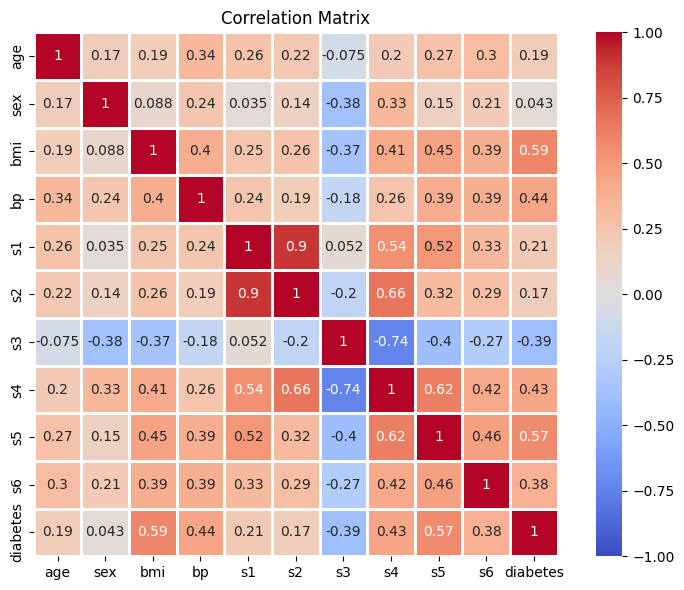

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# 1. Load the data
dataset = datasets.load_diabetes(as_frame=True)
print(dataset.DESCR)

# 2. Prepare the data
# Create observations matrix (X) and target vector (y)
X, y = dataset.data, dataset.target

# Create a unified DataFrame containing both predictors and target
data = pd.concat([X, y.rename('diabetes')], axis=1)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# 3. Visualize the data
plt.figure(figsize=(8,6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=1
)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


## Exercise 2: Partial Correaltion

Age could be influencing both BMI and diabetes progression. As people age, both their BMI and risk for diabetes may increase, potentially inflating the observed correlation between BMI and diabetes progression. By holding age constant, we can test whether the relationship between BMI and diabetes progression persists independently of age.

Hypothesis:

- Null Hypothesis ($H_0$​): There is no relationship between BMI and diabetes progression after controlling for age.
- Alternative Hypothesis ($H_1$​): There is a relationship between BMI and diabetes progression, even after controlling for age.

Tasks:

- Use the `pingouin` library to calculate the partial correlation between BMI and diabetes progression, controlling for age.
- Compare the partial correlation coefficient to the original Pearson correlation coefficient. Did the correlation decrease after accounting for age? What does this suggest about age as a confounding factor?


In [6]:
import pingouin as pg

partial_corr = pg.partial_corr(data=data, x='bmi', y='diabetes', covar='age')
pearson_corr = data['bmi'].corr(data['diabetes'])

print(partial_corr)
print("\nNormal pearson correlation:", pearson_corr)

# Interpretation:
# After controlling for age, the relationship between BMI and diabetes progression persists, though it is slightly weaker. 
# This suggests that while age has some influence, BMI remains a significant predictor of diabetes progression.

           n         r         CI95%         p-val
pearson  442  0.571553  [0.51, 0.63]  1.309246e-39

Normal pearson correlation: 0.5864501344746885


## Exercise 3: Multiple linear regression

1. Estimate a *multiple linear regression model* using the three variables that show the highest correlation with diabetes progression as the predictors, and diabetes progression as the outcome variable.
2. Estimate a second model with different predictors.
2. Compare the models. What is their *R-squared value*? What does it tell you about the performance of the models?

*Tip: When working in Jupyter Notebooks, it might make sense to put different models/computations in separate code cells, so they can be evaluated individually and the outputs are easier to read.*

**Additional note:** This exercise asks you to use the three highest correlated variables in the first model. This can be useful as an exploratory step, but brings many potential issues such as potentially high multicollinearity or the risk of overfitting. These topics will be covered later in the year.

In [7]:
import statsmodels.formula.api as smf

model = smf.ols(formula='diabetes ~ bmi + bp + s5', data=data)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     134.8
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           7.16e-62
Time:                        15:33:59   Log-Likelihood:                -2402.6
No. Observations:                 442   AIC:                             4813.
Df Residuals:                     438   BIC:                             4830.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.653     57.342      0.0

In [8]:
model2 = smf.ols(formula='diabetes ~ sex + s1 + s6', data=data)
results2 = model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               diabetes   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     26.99
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           4.93e-16
Time:                        15:33:59   Log-Likelihood:                -2509.7
No. Observations:                 442   AIC:                             5027.
Df Residuals:                     438   BIC:                             5044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      3.380     45.006      0.0